In [151]:
import numpy as np
from scipy.signal import convolve2d

# Ising Model

The Ising model is a mathematical model of ferromagnetism in statistical mechanics. The model consists of discrete variables that represent magnetic dipole moments of atomic spins that can be in one of two states (+1 or -1). The spins are arranged in a lattice, and the model is used to study phase transitions and critical phenomena in statistical mechanics.

## Basic Ising Model

- **Components:** A lattice where each point represents an atomic 'spin' that can be in one of two states (+1 or -1).
- **Interactions:** Spins interact with thier nearest neighbors, which can be either ferromagnetics (aligning) or antiferromagnetic (opposing).
- **Energy:** The energy depends on the alignment of neighboring spins. Aligning spins have lower energy than opposing spins.
- **Temperature:** The temperature of the system affects the probability of a spin flipping. At high temperatures, spins are more likely to flip, while at low temperatures, spins are more likely to align.

## Phase Transition in the Ising Model

- **Low Temperature (Ordered Phase):** At low temperatures, the spins tend to align, and the system has a net magnetization.
- **High Temperature (Disordered Phase):** At high temperatures, the spins are more likely to flip, and the system has no net magnetization.
- **Critical Temperature:** The temperature at which the system transitions from the ordered phase to the disordered phase.
- **Critical Phenomena:** The behavior of the system near the critical temperature, such as the divergence of the correlation lengths.

In [152]:
def convolve_periodic(lattice): 
    kernel = np.array([[1,1,1]] * 3)
    return convolve2d(lattice, kernel, mode='same', boundary='wrap')

def lattice_energy(lattice, J=1.0):
    return -J * np.sum(lattice * convolve_periodic(lattice))

def metropolis(lattice, T=1.0, J=1.0):
    new_lattice = lattice.copy()
    i, j = np.random.randint(0, new_lattice.shape[0], 2)
    new_lattice[i, j] *= -1
    dE = lattice_energy(new_lattice, J) - lattice_energy(lattice, J)
    if dE < 0 or np.random.rand() < np.exp(-dE / T):
        return new_lattice
    return lattice

def check_equillibrium(lattice):
    uniques, _ = np.unique(lattice, return_counts=True)
    return len(uniques) == 2

In [186]:
no_replicates = 3
n = 10
random_seeds = [1, 2, 3]

energy_reps = []
mag = []
for i in range(no_replicates):
    energies = []
    lattice = np.random.choice([-1, 1], size=(n, n))
    magnetization = []

    np.random.seed(random_seeds[i])

    while check_equillibrium(lattice):
        lattice = metropolis(lattice)
        energies.append(lattice_energy(lattice))
        spin = np.unique(lattice, return_counts=True)
        try:
            magnetization.append((spin[0][0] * spin[1][0] + spin[0][1] * spin[1][1]) / n**2)
        except:
            magnetization.append(magnetization[-1])
    print(f'finished iteration {i}')

    
    energy_reps.append(energies)
    mag.append(magnetization)

# should do this in the loop dumby
avg_energies = []
for i in energy_reps:
    avg_energies.append([np.mean(i[:j+1]) for j in range(len(i))])

# could add something that takes a running average of the energy
    # and then stops when the running average is constant for a certain number of iterations
    # or when the running average is constant to a certain number of decimal places
    # or if the delta is really small

finished iteration 0
finished iteration 1
finished iteration 2


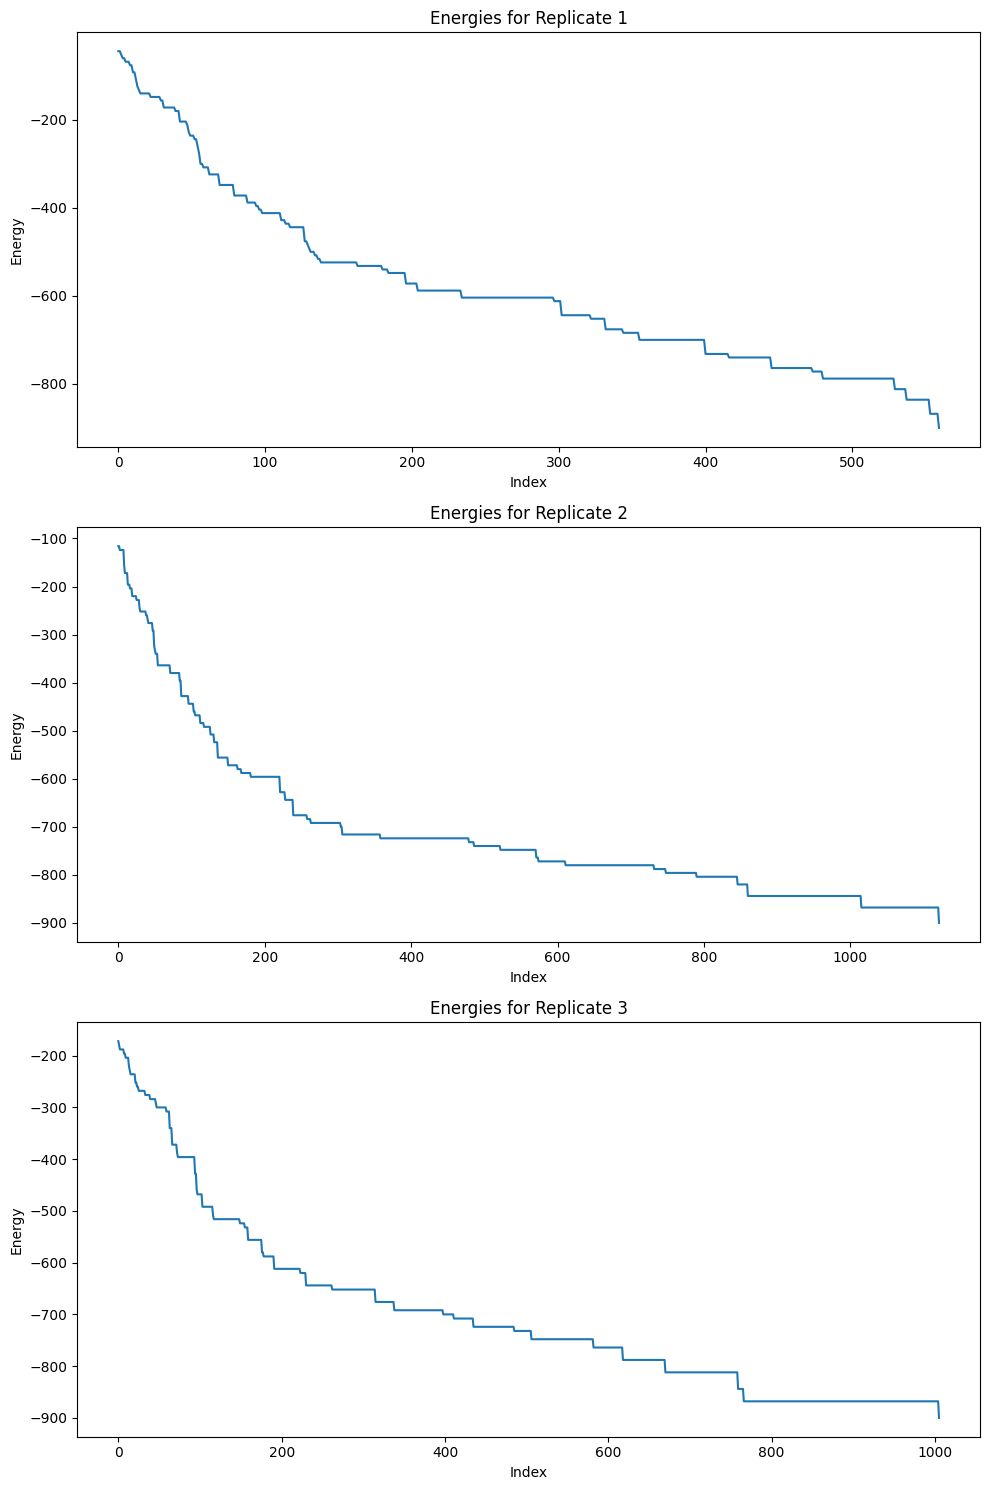

In [188]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(energy_reps), 1, figsize=(10, 15))

for i, energies in enumerate(energy_reps):
    axs[i].plot(range(len(energies)), energies)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Energy')
    axs[i].set_title(f'Energies for Replicate {i+1}')

plt.tight_layout()
plt.show()



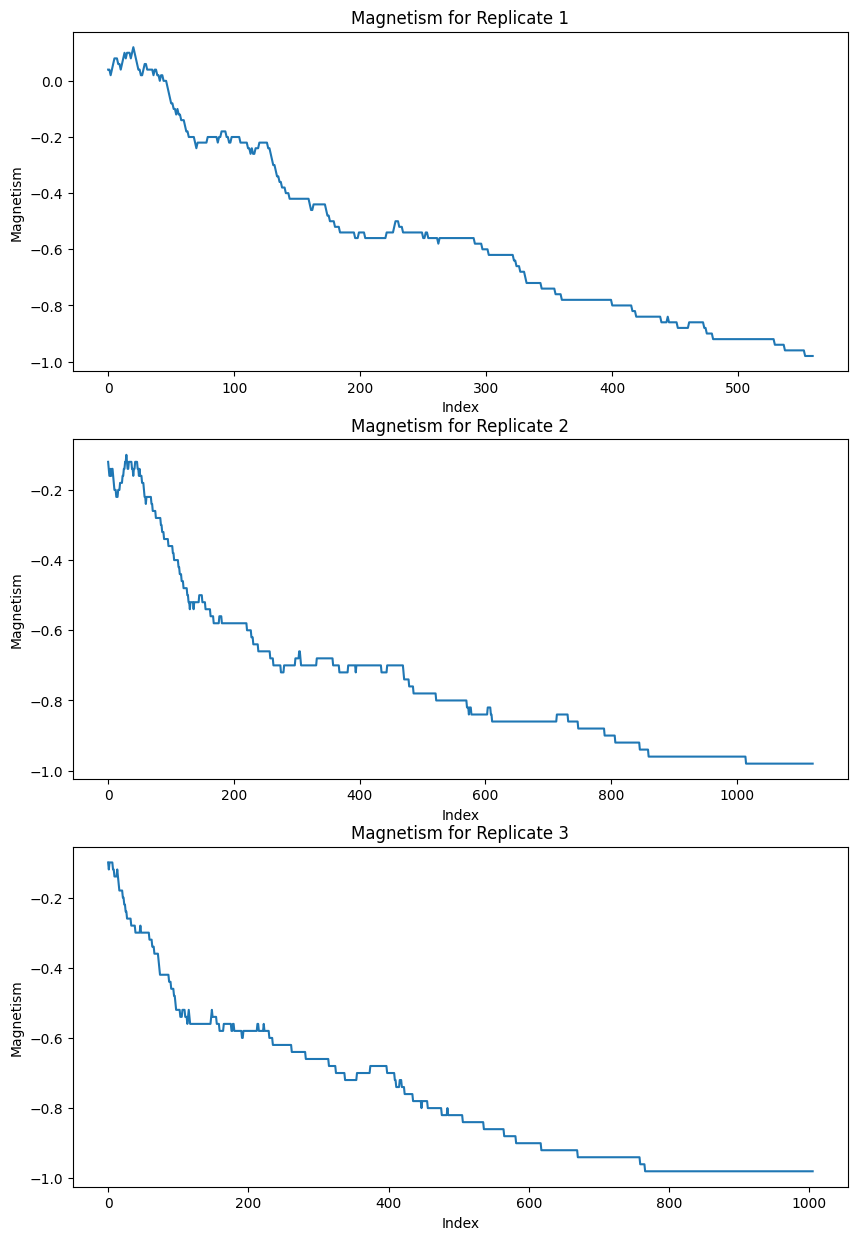

In [193]:
fig, axs = plt.subplots(len(mag), 1, figsize=(10, 15))


for i, m in enumerate(mag):
    axs[i].plot(range(len(m)), m)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Magnetism')
    axs[i].set_title(f'Magnetism for Replicate {i+1}')

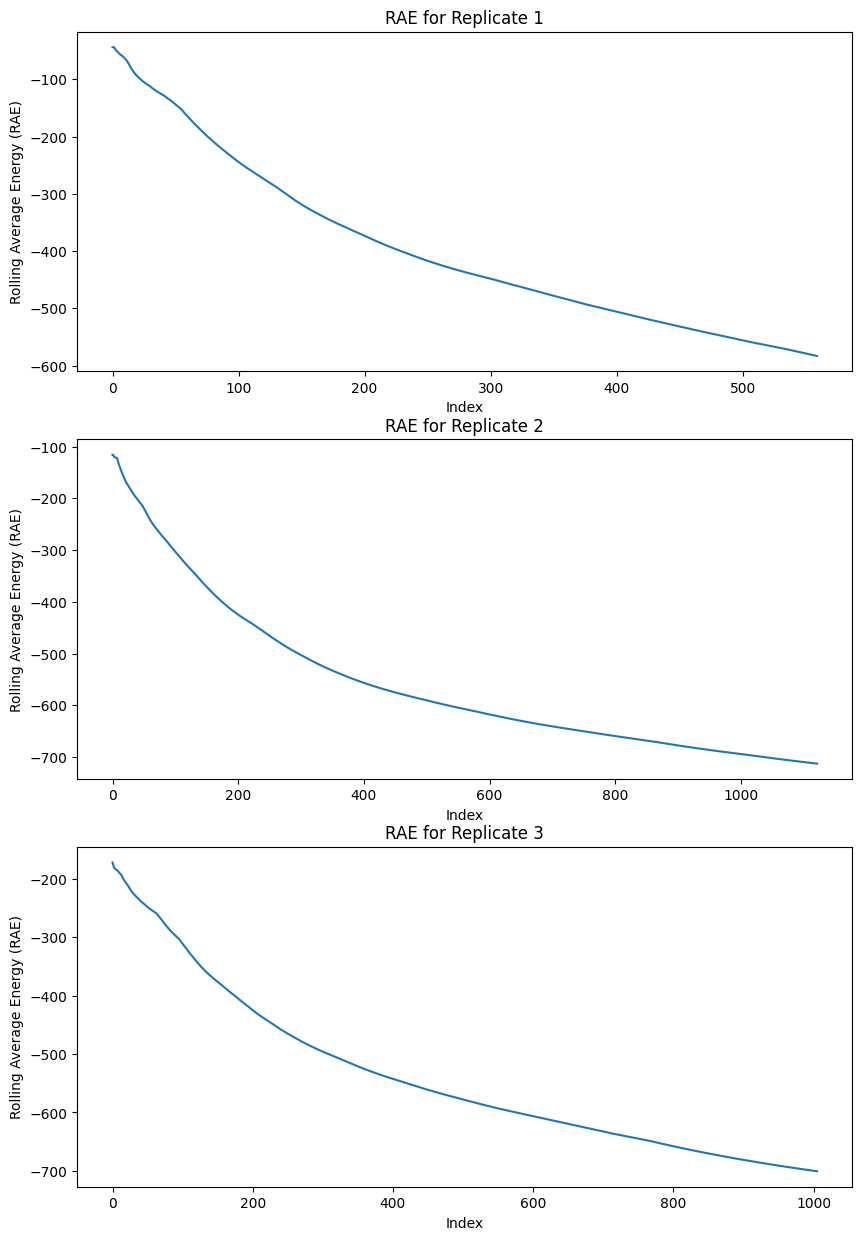

In [194]:
fig, axs = plt.subplots(len(mag), 1, figsize=(10, 15))


for i, m in enumerate(avg_energies):
    axs[i].plot(range(len(m)), m)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Rolling Average Energy (RAE)')
    axs[i].set_title(f'RAE for Replicate {i+1}')